In [9]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [11]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [12]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.714286,0.857143,1.000000,1.000000,0.333333,0.714286
1,0.500000,1.000000,1.000000,0.666667,1.000000,0.833333
2,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.500000,0.500000,1.000000,1.000000,0.833333,0.833333
...,...,...,...,...,...,...
45,0.714286,0.500000,0.666667,1.000000,1.000000,1.000000
46,0.666667,1.000000,1.000000,1.000000,0.666667,0.500000
47,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000
48,0.666667,1.000000,1.000000,1.000000,1.000000,0.833333


In [13]:
length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.258967,13.786353,5.321419,2.901436,1.735893,25.308622
1,1.166525,14.211939,5.721894,3.158037,3.743139,2.290091
2,1.178633,13.537125,26.431475,3.355749,1.966022,1.871536
3,1.175594,13.249743,5.451618,2.651523,1.701030,8.596456
4,1.148400,14.045916,5.683046,3.483785,1.690402,4.511139
...,...,...,...,...,...,...
45,1.282862,13.785234,22.142519,3.226029,1.758326,10.678812
46,1.164780,13.583160,7.149421,2.827842,1.948048,176.404555
47,1.173632,13.903021,5.485581,2.949867,1.761248,3.009613
48,1.155154,13.624630,5.372371,2.993582,1.731995,2.748298


In [14]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.774639,4.754626,5.385438,6.062667,5.715567,4.774639
1,4.747049,5.007723,4.517161,5.284633,5.598432,4.747049
2,4.853868,5.004523,4.477550,4.936360,5.975434,4.853868
3,5.547141,6.023852,5.498041,6.179695,6.447653,5.547141
4,4.162055,3.863381,4.093041,4.473121,4.453665,4.162055
...,...,...,...,...,...,...
45,4.976313,4.504989,4.552447,4.692785,5.201841,4.976313
46,5.266812,4.621166,4.948239,6.182258,5.300265,5.266812
47,4.680895,4.717608,4.603610,5.317180,5.558006,4.680895
48,3.773166,3.957127,4.572552,3.898007,5.014722,3.773166


In [15]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_10482/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_10482/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_10482/512556351.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.666210
RRT(1)         0.891619
RRT(2.5)       0.909257
RRT(5)         0.905952
RRT(10)        0.904686
Tree-values    0.900524
dtype: float64
Length :
 Naive           1.177034
RRT(1)         13.482566
RRT(2.5)        6.389272
RRT(5)          4.117242
RRT(10)         3.177457
Tree-values    13.234837
dtype: float64
MSE :
 Naive          4.703286
RRT(1)         4.713445
RRT(2.5)       4.911319
RRT(5)         5.141066
RRT(10)        5.403320
Tree-values    4.703286
dtype: float64


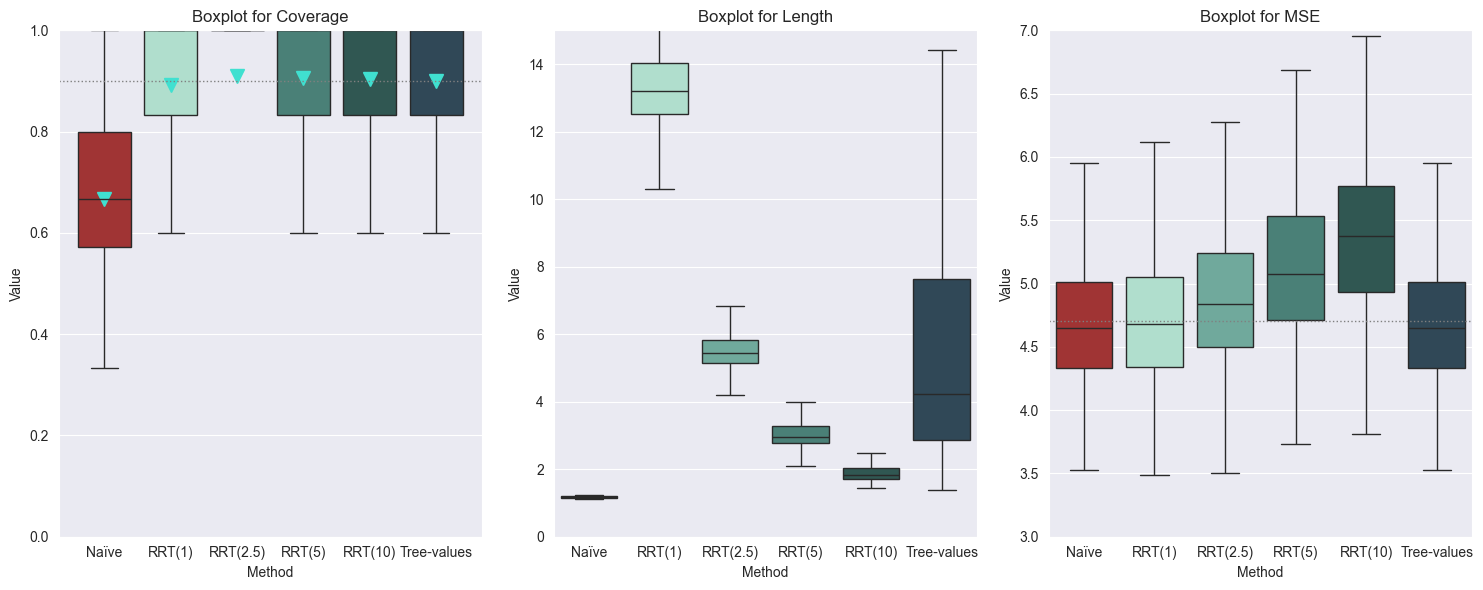

In [16]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])